### Data wrangling project 

#### Author/Analyst: Leon Hamnett

#### [LinkedIn](https://www.linkedin.com/in/leon-hamnett/)

### Table of contents
1. [Introduction](#introduction)
2. [Gathering Data](#gather)
3. [Wrangling Data](#wrangle)
    1. [Assessing Data](#assess)
    2. [Data Cleaning](#clean)
    3. [Data Tidying](#tidy)
4. [Analysing Data](#analysis)
5. [Conclusions](#conclusions)


### Introduction <a name="introduction"></a>

For this project we will be performing the Data Wrangling process to look at tweets from the twitter account "WeRateDogs". This is a humorous twitter accounts which posts funny pictures of dogs, along with a rating (usually more than 10 out of 10) as well as some funny text/image caption.

We will be obtaining sets of data in a variety of ways, including standard file acess, programatically downloading/requesting data and using a Twitter API.

Once this data is gathered, we will open the data within python pandas to assess the data for quality (content issues) and tidiness (structural issues). Both visual and programatic methods will be used to identify any issues with this dataset.

After assessing the data, we will work on cleaning the data - looking at each issue identified in the assessing step and working to resolve it. At the end of this stage, we hope to have a dataset(s) which has been appropiately cleaned to enable easier and more accurate analysis.

Finally some exploratory data analysis and/or data visualisations will be carried out.


### Gather <a name="gather"></a>

During this stage, we will gather the necessary data. First we have a CSV file provided (as if on our company server) of an archive of all the tweets sent by the account of interest. This will form the main bulk of our data.


In [1]:
#load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#open CSV file
twit_archive = pd.read_csv('twitter_archive_enhanced.csv')
twit_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next we will programatically request the information from a classification which attempts to classify the dog type based on the image that was included in the twitter post (as if one of our colleagues has carried out this analysis and is storing the information on a server). 

We import the libaries and download the file programatically from the server:

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv',mode='w+') as file:
        file.write(r.text)
#check file has loaded correctly
image_predicts = pd.read_csv('image_predictions.tsv',sep='\t')
image_predicts.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Now we will use the Twitter developer API to access the JSON file structure to get additional data about the tweets that were made. We will save this information into the twit_archive dateframe:

In [5]:
%%script false --no-raise-error
#cell prevented from running for speedier processing
#above line can be commented out if full output is desired
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These keys are hidden to comply with Twitter's API usage terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twit_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
#print(fails_dict)


Now we have used the API and JSON file structure to obtain the information needed, we will take it from our text file and create a new dataframe.

In [6]:
### read the information from the twitter API text file into a dataframe:
import json
# empty list to store data
data = []
with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        current_dic = json.loads(line)
        tweet_id = current_dic['id']
        retweets = current_dic['retweet_count']
        favorites = current_dic['favorite_count']
        data.append({'tweet_id':tweet_id,'retweets':retweets,'favorites':favorites})
twit_api = pd.DataFrame(data)
twit_api.tail()    

,tweet_id,retweets,favorites
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


### Wrangle Data <a name="wrangle"></a>

In this stage we will begin to wrangle our data by cleaning and tidying the data to end up with a dataset which would be suitable for exploratory analysis.

### Assess <a name="assess"></a>

First we will assess our data both using code and visual assessment to identify any issues with the data. These issues will then be resolved and the data can then be tidied.

In [7]:
twit_archive.head()
twit_archive.tail()
twit_archive.sample(100)
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
image_predicts.head()
image_predicts.tail()
image_predicts.sample(100)
image_predicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
twit_api.head()
twit_api.tail()
twit_api.sample(100)
twit_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweet_id   2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   favorites  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Issues identified during assessment:

After assessing the data the following content issues have been identified:

1) Leftover HTML code in source column in twit_archive table.

2) URLS in the expanded URL column in the twit_archive table are repeated more than once for each entry. Sometimes containing URLS not related to the tweets made by this account.

3) The columns rating_numerator and rating numerator in the twit_archive table have minimum values of 0, check if this is an error.

4) Many items in the names column of the twit_archive table are not correct dog names or the parser has picked up an incorrect string by mistake.

5) In the timestamp column in the twit_archive table, there appears to be a timezone value with has zero for all values.

6) There is not a predicted dogtype column in the image_prediction table.

7) There is not a single confidence probability in the image prediction table for the dog predicted.

8) There are incorrect datatypes across all tables, tweet_id should be changed to string, timestamp should be datetime etc.

Tidiness issues:

1) The columns doggo,floofer,pupper,puppo need to be collapsed into a single variable.

2) We are not interested in analysing retweets or replies so all these rows and columns must be removed.

3) We need to merge columns into one table that follows the three rules for tidy data.

### Clean Data: <a name="clean"></a>

Now we will clean our data, attempting to resolve the issues mentioned above. For each issue we will **define** the problem, then write **code** to find a solution, and then **test** that the code has worked as expected. 

First we create working copies of all datasets in case the original data needs to be referred to:

In [10]:
twit_archive_edit = twit_archive.copy()
image_predicts_edit = image_predicts.copy()
twit_api_edit = twit_api.copy()

#### Content Issue No. 1:

#### Define: 

The source column in the twitter archive table contains uneeded html tags leftover from the extraction process. Use split function to obtain website only.

#### Code:

In [11]:
#split and exract single source
twit_archive_edit['source_n']=twit_archive_edit['source'].str.split(pat='"')
twit_archive_edit['source_n']=twit_archive_edit['source_n'].map(lambda x:x[1])

#### Test: 

In [12]:
#check the value counts to check the source column has been processed correctly
twit_archive_edit['source_n'].value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source_n, dtype: int64

#### Content Issue No. 2:

#### Define: 

Many URLS in the expanded URL column in the twit_archive table are repeated more than once for each entry.
Use a map function with custom function to check if there is more than one identical url, if so split into parts and select the first.

#### Code:

In [13]:
#define function to use inside the apply function to return a single URL
def url_fix(url):
    if (',' in str(url)) == True:
        split = url.split(',')
        for x in range(len(split)):
            if ('twitter' in split[x]) == True:
                return split[x]
            else:
                continue
        return split[0]
    else:
        return url
        
#create new column with single url
twit_archive_edit['urls_new']=twit_archive_edit['expanded_urls'].map(url_fix,na_action='ignore')

#### Test:

In [14]:
#visually check
twit_archive_edit[['expanded_urls','urls_new']]
#make sure new urls column no longer contains multiple links per url , returns Nan so this is correct
sum(twit_archive_edit.urls_new.str.contains(pat=','))

nan

#### Content Issue No. 3:

#### Define: 

We see that for columns rating_numerator and rating numerator in the twit_archive table, the minimum values for these columns is 0. This could be an error so we check and see if it needs fixing:

#### Code:

In [15]:
#find rows with zero for numerator or denominator
twit_archive_edit.loc[(twit_archive_edit['rating_numerator']==0)|(twit_archive_edit['rating_denominator']==0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_n,urls_new
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,http://twitter.com/download/iphone,NaN
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/835152434...
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/746906459...


We see there are three rows with this issue. The second and third rows appear to be legitimate uses of a nominator of zero. The first row looks like the account is correcting another user who wrote (960/00) and the text extraction hs picked up the wrong set of numbers by mistake. We will change this as follows: 

In [16]:
#assign the correct values for this row
twit_archive_edit.at[twit_archive_edit['tweet_id']==835246439529840640,'rating_numerator']=13
twit_archive_edit.at[twit_archive_edit['tweet_id']==835246439529840640,'rating_denominator']=10

#### Test:

In [17]:
#check specific row
twit_archive_edit.loc[twit_archive_edit['tweet_id']==835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_n,urls_new
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None,http://twitter.com/download/iphone,NaN


#### Content Issue No 4:

#### Define: 

There are many items for names of dogs in the names column of the twit_archive table which are not correct dog names or the parser has picked up an incorrect string by mistake. Find all invalid dog names and set them to 'None'.

#### Code:

In [18]:
#check names of dogs
all_names = []
all_names = twit_archive_edit['name'].value_counts().sort_index().index
#create list of common badnames, usually lower case letters, 
#found at the end of the name list when sorted by most popular to least popular
bad_names = all_names[932:]
#locate and correct bad names
bad_rows_name = twit_archive_edit.loc[twit_archive_edit['name'].isin(bad_names)]
twit_archive_edit.loc[bad_rows_name.index,'name']='None'

#### Test:

In [19]:
#check bad names have been remove
twit_archive_edit.loc[twit_archive_edit['name'].isin(bad_names)]
twit_archive_edit['name'].value_counts()

None       854
Charlie     12
Cooper      11
Oliver      11
Lucy        11
          ... 
Chef         1
Blanket      1
Sully        1
Erik         1
Schnozz      1
Name: name, Length: 932, dtype: int64

#### Content Issue No 5:

#### Define: 

In the timestamp column in the twit_archive table, there appears to be a timezone value with has zero for all values. This will be removed so the entire column can be changed into datetime format.

#### Code:

In [20]:
#split timestamp column on the plus symbol to isolate timezone
timestamp_split = twit_archive_edit['timestamp'].str.split(pat='+',expand=True)
#check to make sure there is no valid information in the timezone part
timestamp_split[1].value_counts()
#we see there is no relevant information in this part of the timestamp column 
#so it can be discarded
twit_archive_edit['timestamp_n']=timestamp_split[0]

#### Test:

In [21]:
#check to make sure new timestamp column has been added and timezone has been removed
twit_archive_edit.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_n,urls_new,timestamp_n
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/892420643...,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/892177421...,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891815181...,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891689557...,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891327558...,2017-07-29 16:00:24


#### Content Issue No 6:

#### Define: 

There is not a predicted dogtype column in the image_predicts_edit table. We check the prediction one, two or three which was used and return the predicted dogtype.

#### Code:

In [22]:
# define function to obtain the predicted dog type from p1,p2,p3 predictions
def dog_type(row):
    if (row['p1_dog']==True):
        return row['p1']
    elif (row['p2_dog']==True):
        return row['p2']
    elif row['p3_dog']==True:
        return row['p3']
    else:
        return 'No dog predicted'

#capitalise dog names so they can be grouped togethor appropiately
image_predicts_edit['p1']=image_predicts_edit['p1'].str.capitalize()
image_predicts_edit['p2']=image_predicts_edit['p2'].str.capitalize()
image_predicts_edit['p3']=image_predicts_edit['p3'].str.capitalize()
#apply function to get predicted dog type
image_predicts_edit['dog_pred'] = image_predicts_edit.apply(dog_type,axis=1)
#capitalise new column
image_predicts_edit['dog_pred'] = image_predicts_edit['dog_pred'].str.capitalize()

#### Test:

In [23]:
#check predicted dog type values
image_predicts_edit['dog_pred'].value_counts()

No dog predicted        324
Golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Bouvier_des_flandres      1
Irish_wolfhound           1
Japanese_spaniel          1
Silky_terrier             1
Standard_schnauzer        1
Name: dog_pred, Length: 114, dtype: int64

#### Content Issue No 7:

#### Define: 

There is not a single probability for the prediction confidence in the image prediction table for the dog predicted. We will return the appropiate confidence in the dog predicted result.

#### Code:

In [24]:
#define a function to return confidence probability depending on whether p1,p2,p3 was used
def conf_final(row):
    if row['dog_pred'] == row['p1']:
        return row['p1_conf']
    elif row['dog_pred'] == row['p2']:
        return row['p2_conf']
    elif row['dog_pred'] == row['p3']:
        return row['p3_conf']
    else:
        return None

#apply function to return correct confidence probability 
image_predicts_edit['conf_total'] = image_predicts_edit.apply(conf_final,axis=1)

#### Test:

In [25]:
#check values for confidence 
image_predicts_edit['conf_total'].value_counts().sort_index(ascending=False)

0.999956    1
0.999953    1
0.999885    1
0.999876    1
0.999837    1
           ..
0.000081    1
0.000077    1
0.000062    1
0.000014    1
0.000010    1
Name: conf_total, Length: 1688, dtype: int64

#### Content issue No 8:

#### Define: 

Fix incorrect data types change all tweet_id to string, timestamp_n to datetime type.

#### Code:

In [26]:
#change data types
#change tweet_id into string as it is not necessary that this value is set as an integer
twit_archive_edit = twit_archive_edit.astype({'tweet_id':'object'})
image_predicts_edit = image_predicts_edit.astype({'tweet_id':'object'})
twit_api_edit = twit_api_edit.astype({'tweet_id':'object'})
#change timestamp to datetime for easier processing
twit_archive_edit['timestamp_n']  = pd.to_datetime(twit_archive_edit['timestamp_n'],format='%Y-%m-%d %H:%M')

#### Test:

In [27]:
twit_archive_edit.info()
twit_api_edit.info()
image_predicts_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   object        
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Tidy Data: <a name="tidy"></a>

In this section, now we have resolved the cleanliness issues, we will resolve the tidiness issues.
We will aim for a tidy dataset following the rules of tidy data:

>Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:
>
>1) Each variable forms a column.
>
>2) Each observation forms a row.
>
>3) Each type of observational unit forms a table. <br>
[ref](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html)

#### Tidiness issue No 1:
#### Define: 

For tidy data we need to change the  doggo,floofer,pupper,puppo column into a single variable column. Also some columns have multiple dog types.

#### Code:

In [28]:
#create copy of dataframe
twit_archive_edit2 = twit_archive_edit.copy()
#check for anomalous data when assigning dog type
twit_archive_edit2.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


We see above that there are a number of rows which have more than one type: 'doggo,puppo' , 'doggo,pupper' and ' doggo,floofer'. 

In [29]:
#set nones and nans to empty string for easier processing
twit_archive_edit2.doggo.replace('None','',inplace=True)
twit_archive_edit2.doggo.replace(np.nan,'',inplace=True)
twit_archive_edit2.floofer.replace('None','',inplace=True)
twit_archive_edit2.floofer.replace(np.nan,'',inplace=True)
twit_archive_edit2.pupper.replace('None','',inplace=True)
twit_archive_edit2.pupper.replace(np.nan,'',inplace=True)
twit_archive_edit2.puppo.replace('None','',inplace=True)
twit_archive_edit2.puppo.replace(np.nan,'',inplace=True)

#add code for more than one type
twit_archive_edit2['dog_nickname_type'] = twit_archive_edit2.doggo + \
                                        twit_archive_edit2.floofer + \
                                        twit_archive_edit2.pupper + \
                                        twit_archive_edit2.puppo

#edit rows with more than one nickname type
twit_archive_edit2.loc[twit_archive_edit2.dog_nickname_type == 'doggopupper', 'dog_nickname_type'] = 'doggo, pupper'
twit_archive_edit2.loc[twit_archive_edit2.dog_nickname_type == 'doggopuppo', 'dog_nickname_type'] = 'doggo, puppo'
twit_archive_edit2.loc[twit_archive_edit2.dog_nickname_type == 'doggofloofer', 'dog_nickname_type'] = 'doggo, floofer'

#### Test:

In [30]:
#check
twit_archive_edit2.sample(100)
twit_archive_edit2.dog_nickname_type.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_nickname_type, dtype: int64

#### Tidiness issue No 2:

#### Define:
Remove columns and rows relating to retweets and replies as we are only interested in original tweets.

Rows to remove:
rows with non empty retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

Columns to remove: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp

First we remove the rows:

#### Code:

In [34]:
#drop rows which are replies or retweets
columns_to_check = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                'retweeted_status_user_id','retweeted_status_timestamp']
#cycle through columns, identify bad rows and remove
for col in columns_to_check:
    rows_to_drop = twit_archive_edit2.loc[twit_archive_edit2[col].notnull()]
    twit_archive_edit2.drop(index=rows_to_drop.index,inplace=True)
    

#### Test:

In [35]:
#check their are no values left in the retweet related columns
twit_archive_edit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   object        
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

Now we remove the columns:

#### Code:

In [36]:
#drop uneeded columns
cols_to_drop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                 'retweeted_status_user_id','retweeted_status_timestamp',\
               'timestamp','source','expanded_urls']
twit_archive_edit3 = twit_archive_edit2.drop(columns=cols_to_drop)

#rearrange columns for better readability:
list_cols = twit_archive_edit2.columns.tolist()
new_col_order = ['tweet_id','timestamp_n','name','rating_numerator','rating_denominator','text',\
                'source_n','urls_new','dog_nickname_type']
twit_archive_edit3 = twit_archive_edit2[new_col_order]

#### Test:

In [37]:
#confirm columns dropped and rearranged
twit_archive_edit3.head()


,tweet_id,timestamp_n,name,rating_numerator,rating_denominator,text,source_n,urls_new,dog_nickname_type
0,892420643555336193,2017-08-01 16:23:56,Phineas,13,10,This is Phineas. He's a mystical boy. Only eve...,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/892420643...,
1,892177421306343426,2017-08-01 00:17:27,Tilly,13,10,This is Tilly. She's just checking pup on you....,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/892177421...,
2,891815181378084864,2017-07-31 00:18:03,Archie,12,10,This is Archie. He is a rare Norwegian Pouncin...,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891815181...,
3,891689557279858688,2017-07-30 15:58:51,Darla,13,10,This is Darla. She commenced a snooze mid meal...,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891689557...,
4,891327558926688256,2017-07-29 16:00:24,Franklin,12,10,This is Franklin. He would like you to stop ca...,http://twitter.com/download/iphone,https://twitter.com/dog_rates/status/891327558...,


#### Tidiness issue No 3:

#### Define: 

Merge to get user favorites and retweets in same table, add info from predictions into same table as well.

#### Code:

In [38]:
#add favorites and retweets from twit_api table
im_cols_to_merge:['tweet_id','dog_pred','conf_total','jpg_url'] 
im_preds_edit_merge = image_predicts_edit[['tweet_id','dog_pred','conf_total','jpg_url']]

#merge twit_archive and image prediction tables
df_clean = twit_archive_edit3.merge(im_preds_edit_merge,how='left',on='tweet_id')

#merge clean table and twit_api
df_clean2 = df_clean.merge(twit_api_edit,how='left',on='tweet_id')
df_clean2.head()

#remove uneeded columns
df_cleanf = df_clean2.drop(columns=['source_n'])

#reorder for easer readability
df_cleanf = df_cleanf[['tweet_id','timestamp_n','rating_numerator','rating_denominator',\
                      'favorites','retweets','name','dog_pred','conf_total',\
                      'dog_nickname_type','text','urls_new','jpg_url']]

#rename column headers from variables:
df_cleanf = df_cleanf.rename(columns={'timestamp_n':'time_tweeted','dog_pred':'predicted_dog_type',\
                         'conf_total':'dog_prediction_confidence','text':'tweet_text',\
                         'urls_new':'tweet_url','jpg_url':'prediction_image_url','name':'dog_name'})

#### Test:

In [39]:
#check final clean dataframe
df_cleanf.head()
df_cleanf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tweet_id                   2097 non-null   object        
 1   time_tweeted               2097 non-null   datetime64[ns]
 2   rating_numerator           2097 non-null   int64         
 3   rating_denominator         2097 non-null   int64         
 4   favorites                  2097 non-null   int64         
 5   retweets                   2097 non-null   int64         
 6   dog_name                   2097 non-null   object        
 7   predicted_dog_type         1971 non-null   object        
 8   dog_prediction_confidence  1666 non-null   float64       
 9   dog_nickname_type          2097 non-null   object        
 10  tweet_text                 2097 non-null   object        
 11  tweet_url                  2094 non-null   object        
 12  predic

In [40]:
##Assign the clean dataframe to a CSV so it can be accessed easily in the future:
df_cleanf.to_csv('twitter_archive_master.csv',index=False)

### Analysis: <a name="analysis"></a>

Now that our data has been cleaned and tidied, we can now perform some exploratory analysis on the data:

#### Analysis Question No. 1:
What is the most common dog name?

[]

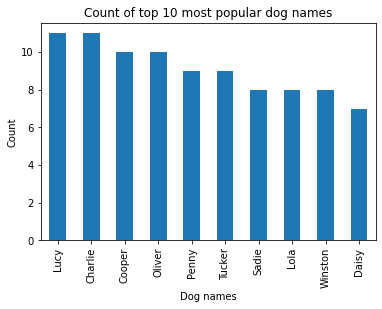

In [41]:
names = df_cleanf.dog_name.value_counts(ascending=False)
to_plot = names[1:11]
ax = to_plot.plot.bar(title='Count of top 10 most popular dog names',grid=False)
ax.set_xlabel('Dog names')
ax.set_ylabel('Count')
ax.plot()

We can see that the most popular dog name is Charlie, followed by Oliver, followed by Cooper.

#### Analysis Question No. 2: 
Is there a relationship between the number of predictions for a certain dog type and the average confidence of that prediction?

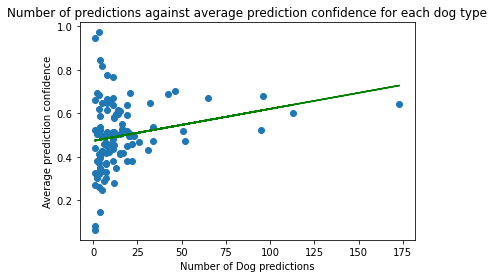

In [42]:
#make graph of no dogs vs prediction confidence
import numpy as np
#create series for x and y variables
scatter_x = image_predicts_edit.dog_pred.value_counts(ascending=False)
scatter_y = image_predicts_edit.groupby('dog_pred').conf_total.mean().sort_values(ascending=False)
scatter_x.drop(index='No dog predicted',inplace=True)
#get rid of Nans
scatter_x.dropna(axis=0,inplace=True)
scatter_y.dropna(axis=0,inplace=True)
#create one dataframe
scatter_both = pd.concat([scatter_x,scatter_y],axis=1,sort=True)
#assign x and y variables
x = scatter_both.dog_pred
y = scatter_both.conf_total
plt.scatter(x,y)
plt.xlabel('Number of Dog predictions')
plt.ylabel('Average prediction confidence')
plt.title('Number of predictions against average prediction confidence for each dog type')
#calculate and add line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color='green')
plt.show()

We can see that there is a slight positive relationship between the number of dog predictions and the certainty that the prediction algorithm is correct in each case. However as the number of dog predictions is clustered between 0 and 10 predictions, and we do not have the information to see whether each prediction is correct, this type of analysis does not provide much information about the accuracy of the dog type identification, machine learning system. 

#### Analysis Question No. 3:

Is there a relationship between the fractional ratings a dog receives and the amount of times the tweet is retweeted or favorited?

/home/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


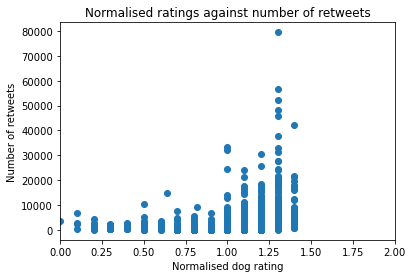

In [43]:
#normalise the fractional ratings
ratings=df_cleanf[['rating_numerator','rating_denominator','favorites','retweets']]
ratings['score_norm']=ratings['rating_numerator']/ratings['rating_denominator']
#plot score norm vs retweets
x = ratings.score_norm
y = ratings.retweets
plt.scatter(x,y)
plt.xlim(0,2)
plt.xlabel('Normalised dog rating')
plt.ylabel('Number of retweets')
plt.title('Normalised ratings against number of retweets')
plt.show()

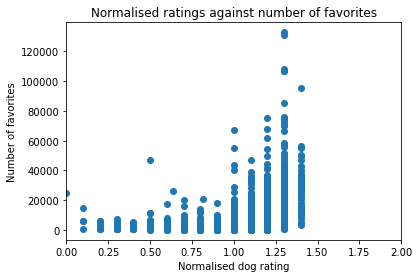

In [44]:
#plot score vs favorites
x1 = ratings.score_norm
y2 = ratings.favorites
plt.scatter(x1,y2)
plt.xlim(0,2)
plt.xlabel('Normalised dog rating')
plt.ylabel('Number of favorites')
plt.title('Normalised ratings against number of favorites')
plt.show()

We can see from the above scatter plots, there is a clear positive relationship between the score given to a dog in each tweet and the amount of favorites and retweets a tweet receives. This implies the higher rated dogs are more popular with the profile's followers.

#### Analysis No. 4:

Is there a relationship between the time when a tweet was created and the amount of favorites and retweets it obtains?

/home/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


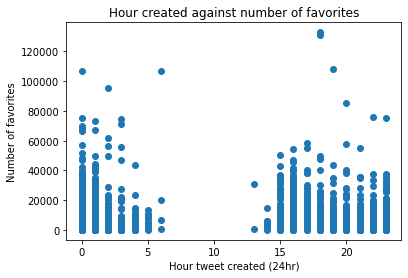

In [45]:
ratings['hour_created']=df_cleanf['time_tweeted'].dt.hour
x1 = ratings.hour_created
y2 = ratings.favorites
plt.scatter(x1,y2)
plt.xlabel('Hour tweet created (24hr)')
plt.ylabel('Number of favorites')
plt.title('Hour created against number of favorites')
plt.show()

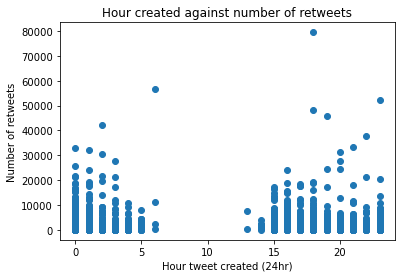

In [46]:
x1 = ratings.hour_created
y2 = ratings.retweets
plt.scatter(x1,y2)
plt.xlabel('Hour tweet created (24hr)')
plt.ylabel('Number of retweets')
plt.title('Hour created against number of retweets')
plt.show()

We can see there is no clear relationship between the time a tweet was made and the amount of favorites or retweets it obtains. Although it is interesting to note from the distributions of hours when the tweets were made, that we can see there is a blank area between the hours of 6 and 12 GMT, presumably when the owner of the twitter account is asleep. 

### Conclusions: <a name="conclusions"></a>

After gathering our data from various sources including a twitter archive file, a JSON file created from the twitter developer API and downloading a file programatically using the requests library, various content and structural issues where identified and fixed to obtain a final dataframe of clean and tidy data.

This clean and tidy data was then used to answer several questions about the information contained within the data and we learned the following insights:

1) The most popular dog names were Charlie, Olver and Cooper

2) There is a slight positive relationship between the number of times the algorithm predicts a dog type from the tweets and the confidence it has in its prediction.

3) There is a significant positive relationship between the ratings given for each dog when tweeted and the amount of favorites and retweets the tweet receives.

4) It doesn't appear there is a significant relationship between the time a tweet was made and the amount of favorites or retweets it obtains.